#                 Telecom Customer Churn Prediction

## Problem statement:

In the telecom industry, customers are able to choose from a pool of companies to cater their needs regarding communication and internet. Customers are very critical about the kind of services they receive and judge the enitre company based on a single experience! These communication services have become so recurrent and inseparable from the daily routine that a 30 minute maintenance break kicks in anxiety in the users highlighting our taken-for-granted attitude towards these services! Coupled with high customer acquisation costs, churn analysis becomes very pivotal! Churn rate is a metric that describes the number of customers that cancelled or did not renew their subscription with the company. Thus, higher the churn rate, more customers stop buying from your business, directly affecting the revenue! Hence, based on the insights gained from the churn analysis, companies can build strategies, target segments, improve the quality of the services being provided to improve the customer experience, thus cultivating trust with the customers. That is why building predictive models and creating reports of churn analysis becomes key that paves the way for growth!
t.

# Dataset:

| 🔢 **Feature**              | 📝 **Description**                                                                 |
|----------------------------|------------------------------------------------------------------------------------|
| **`customerID`**           | 🆔 Unique identifier for each customer                                             |
| **`gender`**               | 🧑‍🤝‍🧑 Gender of the customer (`Male` / `Female`)                                  |
| **`SeniorCitizen`**        | 👴 Senior citizen indicator (`0` = No, `1` = Yes)                                  |
| **`Partner`**              | 💍 Whether the customer has a partner (`Yes` / `No`)                               |
| **`Dependents`**           | 👶 Whether the customer has dependents (`Yes` / `No`)                              |
| **`tenure`**               | 📅 Number of months the customer has stayed                                        |
| **`PhoneService`**         | ☎️ Whether the customer has phone service (`Yes` / `No`)                           |
| **`MultipleLines`**        | 📞 Whether the customer has multiple lines (`Yes`, `No`, `No phone service`)       |
| **`InternetService`**      | 🌐 Type of internet service (`DSL`, `Fiber optic`, `No`)                           |
| **`OnlineSecurity`**       | 🔐 Whether the customer has online security (`Yes`, `No`, `No internet service`)   |
| **`OnlineBackup`**         | 💾 Whether the customer has online backup (`Yes`, `No`, `No internet service`)     |
| **`DeviceProtection`**     | 🛡️ Whether the customer has device protection (`Yes`, `No`, `No internet service`) |
| **`TechSupport`**          | 👨‍💻 Whether the customer has tech support (`Yes`, `No`, `No internet service`)     |
| **`StreamingTV`**          | 📺 Whether the customer has streaming TV (`Yes`, `No`, `No internet service`)      |
| **`StreamingMovies`**      | 🎬 Whether the customer has s


#### Description:
Contains customer information from a telecom service provider to predict customer churn — whether a customer discontinues the service.
#### Purpose:
Designed to analyze customer behavior, identify patterns related to churn, and develop strategies to improve customer retention.
#### Columns:
Includes demographic info, services used, account information, and churn status.
#### Applications:
Churn prediction modeling, customer satisfaction analysis, and targeted marketing.
#### Analysis Tasks:
EDA, data preprocessing, ML model building, evaluation, and model deployment.
#### Relevance:
A real-world dataset widely used for business intelligence, customer relationship management, and predictive analytics in the telecommunications industry.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick # For specifying the axes tick format
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

In [60]:
# Read data
tel = pd.read_csv("Telco_Customer_Churn.csv")

## 2. Data Preprocessing and EDA

In [3]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### The dataset includes :
1. Churn (Target Variable) = Customers who left the services within the last month.
2. Services = PhoneService, MultipleLines,	InternetService, OnlineSecurity, online backup, device protection, tech support, and streaming TV and movies.
3. Customer Account Information = Tenure, Contract, payment method, paperless billing, monthly charges, and total charges.
4. Demographic info about customers = Gender, age range, and if they have partners and dependents

In [4]:
#Checking the null values 
tel.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
 # tel.iloc[[488,753,936, 1082, 1340, 3331, 3826, 4380,5218,6670,6754],]

In [6]:
#Checking the types of the data
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# statistics of the data
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
tel.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [9]:
# Converting the total charges column to numeric data type
tel.TotalCharges = pd.to_numeric(tel.TotalCharges, errors = "coerce")

In [10]:
# checking the null values
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
tel[tel['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [61]:
# Removing missing values
tel.dropna(inplace=True)

In [62]:
# Removing cuatomer_id from the dataset coz it's irrelevant
telco = tel.iloc[:,1:]

In [14]:
# Converting the Predicting column to a binary numeric column
telco["Churn"].replace(to_replace="Yes",value=1 , inplace = True)
telco["Churn"].replace(to_replace="No",value=0 , inplace = True)

In [68]:
# Let's convert all the categories into a dummy variable
telco_dummies = pd.get_dummies(telco)
telco_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_No,Churn_Yes
0,0,1,29.85,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,True,False
1,0,34,56.95,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,2,53.85,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,2,70.70,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


<Axes: >

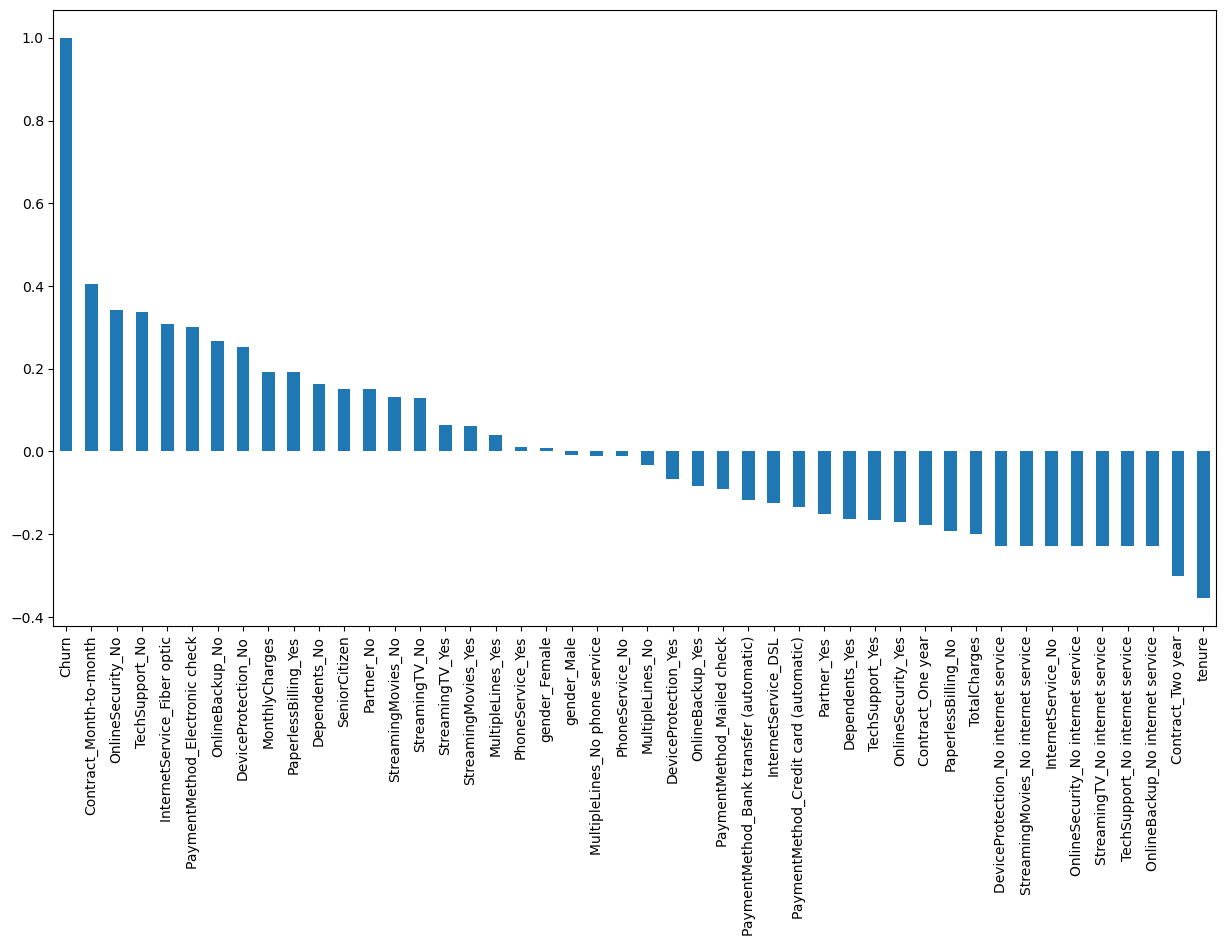

In [16]:
# Get correlation of the dataset
plt.figure(figsize=(15,8))
telco_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Insight :
1. Month to Month Contract , No Online Security and No Tech Support seem to be positively correlated with churn.
2. Tenure , Two Year contract and No internet service seem to be negatively correlated with churn.

#### Retention Strategies:
1. Focus retention strategies on Month-to-Month contract users, Electronic Check payers, and Fiber Optic internet users.
2. Promote long-term contracts and auto-pay methods to reduce churn.
3. Target customers with short tenure for personalized offers or support to increase their lifetime value.

## 3. Data Exploration

To Understand patterns and potentially from some hypothesis.

#### a) Demographic 
Gender , Seniority , Partner and Dependent Status.

1) Gender Distribution

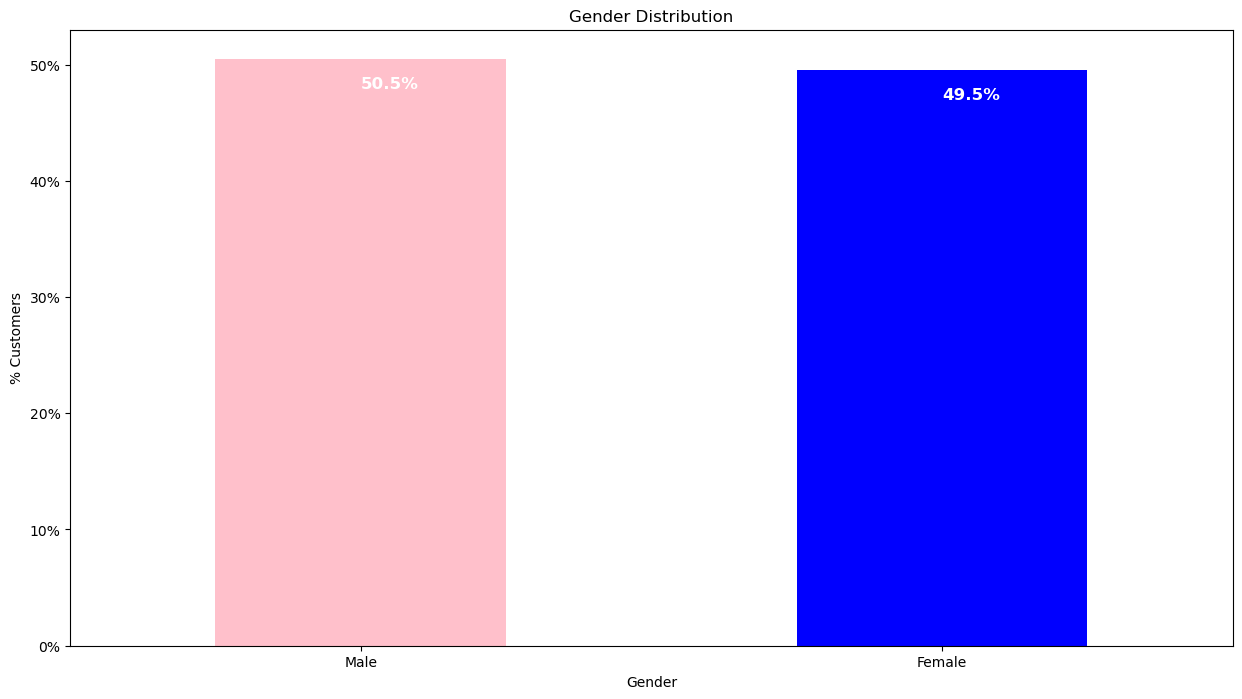

In [17]:
plt.figure(figsize=(15,8))
colors = ['pink','blue']
gender_counts = telco['gender'].value_counts() # total count of gender 
ax = (gender_counts * 100.0/ len(telco)).plot(
    kind = 'bar',
    stacked = True,
    rot = 0 ,
    color = colors
)    # convert the gender counts to % and plot a bar chart rot = 0 rotates x-axis labels to 0 degrees ( so they are horizontal)
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) # the y-axis labels as percentages instead of raw decimal or integer values.
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Iterate over the bar heights and add labels to the bars
total = gender_counts.sum()
for bar , count in zip(ax.patches,gender_counts):  # ax.patches is a list of bar rectangles . # zip() is a pair of each bar with its count.
    percentage = count / total * 100 # converts the raw count in a total percentage.
    ax.text(bar.get_x() + bar.get_width()/2 , bar.get_height() - 2.5,   
            f'{percentage:.1f}%' ,
            fontsize = 12,
            color = 'White',
            weight = 'bold'
           )   # bar.get_x() + bar.get_width()/2 finds horizontal center of the bar so label appears in middle.
               #bar.get_height() - 3.5 determines the vertical position slightly below the top of the bar (for aesthetics) , so the text doesn't sit exactly at the edge.
    # ax.text() adds the text label on the plot.
    #  f'{percentage:.1f}%' format the percentage to 1 decimal. 
plt.show()    

#### Insight:
This chart shows that the data has 50.5% of Males and 49.5% of Females.

2) Senior citizen 

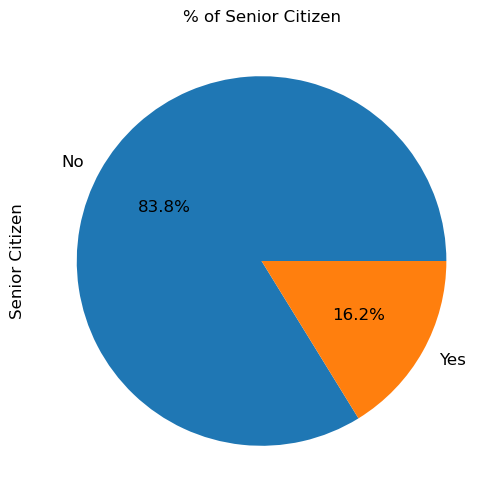

In [72]:
pie = (telco['SeniorCitizen'].value_counts()*100.0/len(telco))\
.plot.pie(autopct = '%.1f%%' , labels = ['No','Yes'],figsize = (10,6),fontsize = 12) 

pie.yaxis.set_major_formatter(mtick.PercentFormatter())
pie.set_ylabel('Senior Citizen',fontsize = 12)
pie.set_title('% of Senior Citizen',fontsize = 12)
plt.show()

#### Insight:
This shows only 16.2% are Senior Citizen , that means most of the customers are younger population.

3) Partner and Dependent status

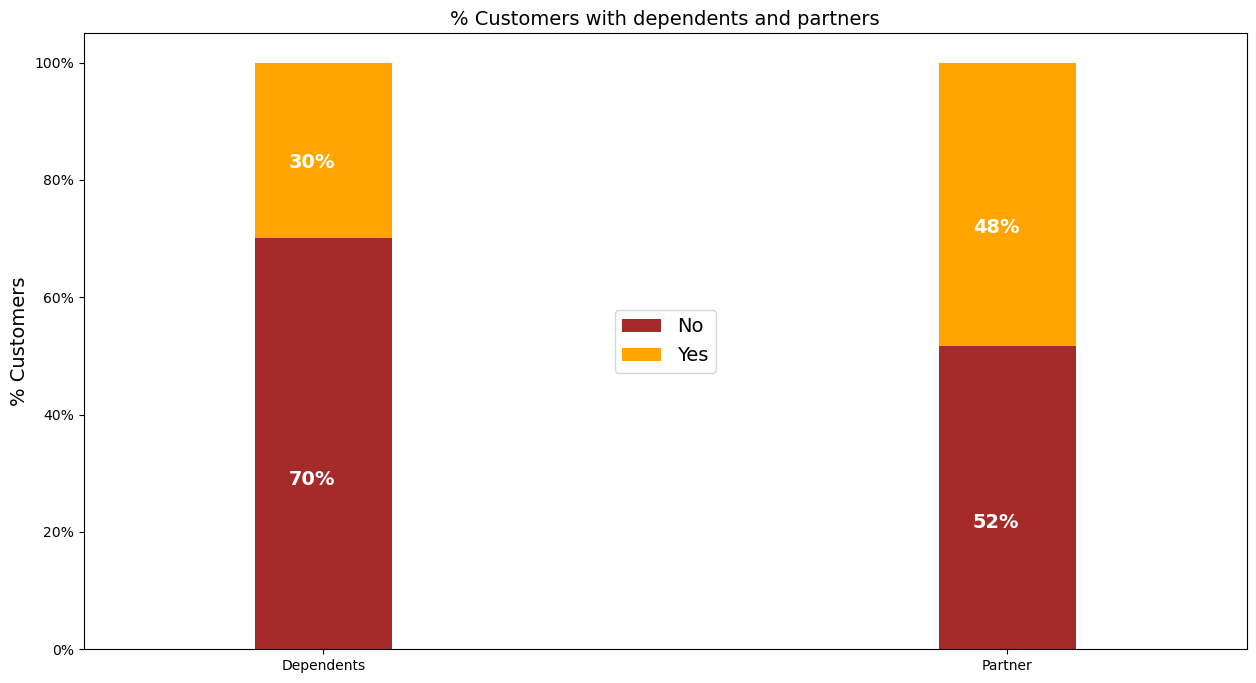

In [19]:
telco = pd.melt(tel, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = telco.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(tel)
colors = ['brown','orange']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(15,8),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

#### Insight:
This shows that about 48% of the customers have partners and 30% of the customers are dependent.

#### b) Customer Account Information.

1) Tenure

Text(0.5, 1.0, 'No. of customers by their tenure')

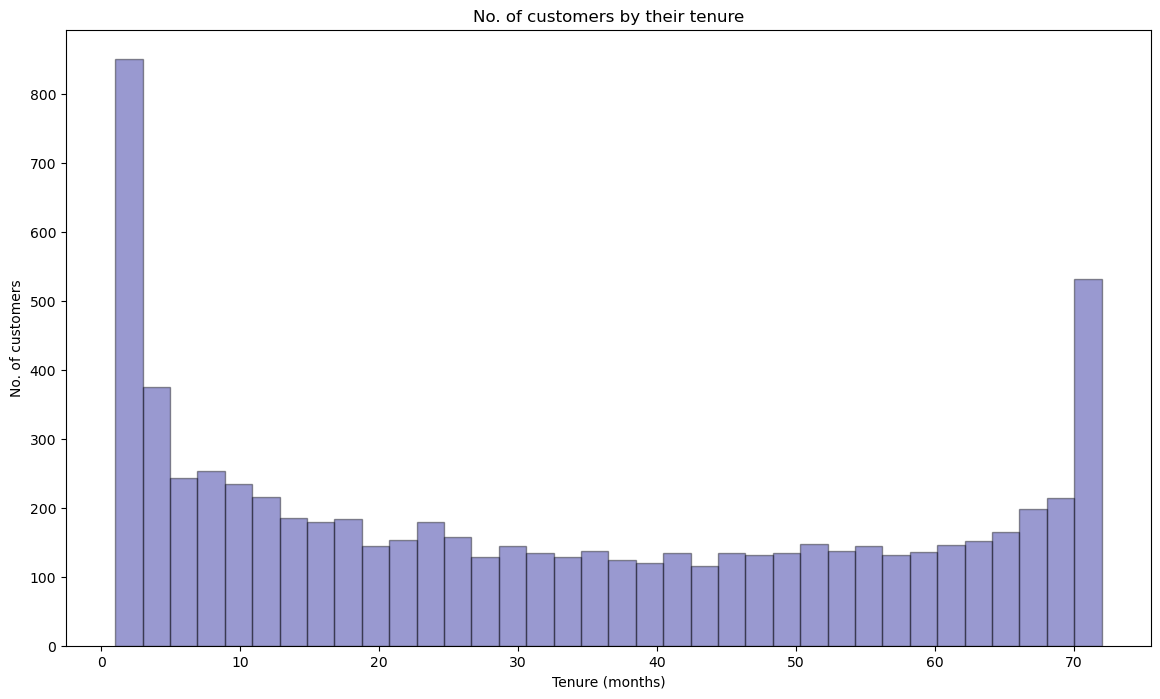

In [20]:
plt.figure(figsize = (14,8))
ax = sns.distplot(tel['tenure'],hist = True , kde = False,
                  bins = int(180/5), color = 'darkblue',
                  hist_kws = {'edgecolor':'black'},
                  kde_kws = {'linewidth':4})
ax.set_ylabel('No. of customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No. of customers by their tenure')

#### Insight:
1. A U-shaped distribution suggests a bifurcation in customer behavior: either they leave quickly or stay long-term — few customers remain in the mid-tenure range.
2. The sharp drop after 1 month raises concerns about customer retention in the early phase — the company may need to improve onboarding, first-month experience, or expectations setting.

2) Contracts 

Text(0, 0.5, 'No. of customers by their contract type')

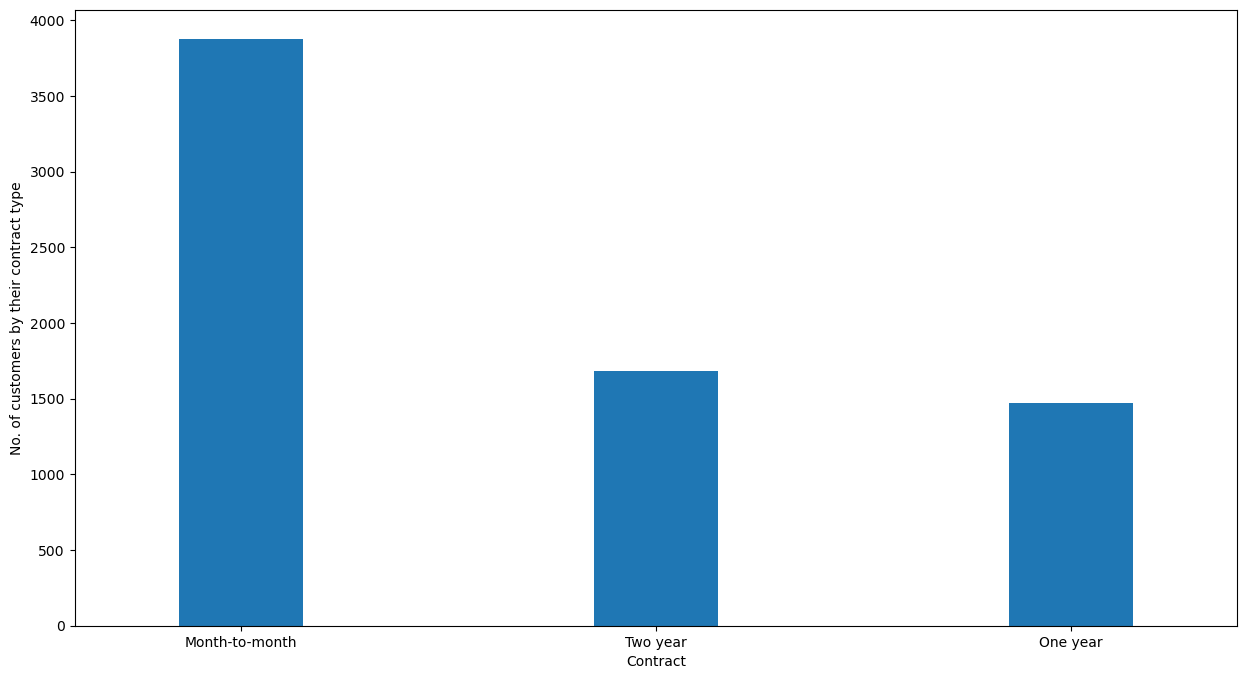

In [21]:
plt.figure(figsize=(15,8))
ax = tel['Contract'].value_counts().plot(kind='bar',rot=0,width=0.3)
ax.set_ylabel('No.of customers')
ax.set_ylabel('No. of customers by their contract type')

#### Insight:
Most of the customers are in the month to month contract while there are almost equal numbers of customers are in Two year and one year contract.

3) Distribution of customer tenure for different contract type

Text(0.5, 1.0, 'One year contract')

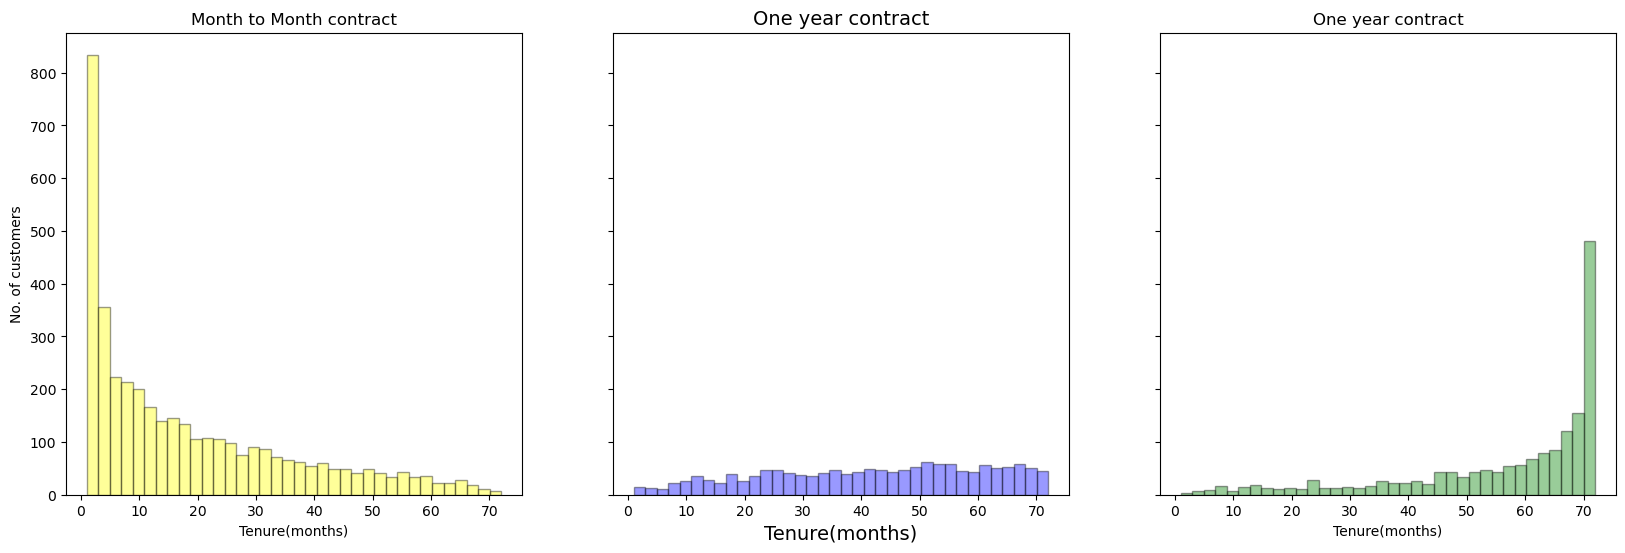

In [22]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 1 , ncols = 3 , sharey = True , figsize = (20,6)) # Sharey = True defines all 3 plot shares the same y-axis
ax = sns.distplot(tel[tel['Contract']=='Month-to-month']['tenure'],
                  hist=True,kde=False,  #Kde = False disables the smooth curve line.
                  bins=int(180/5),color = 'yellow',
                  hist_kws = {'edgecolor' : 'black'}, # edgecolor='black' → adds black borders around each bar.
                  kde_kws = {'linewidth':4},  # linewidth=4 → makes the KDE curve line thicker (default is thinner).
                  ax = ax1)
ax.set_ylabel('No. of customers')
ax.set_xlabel('Tenure(months)')
ax.set_title('Month to Month contract')

ax = sns.distplot(tel[tel['Contract']=='One year']['tenure'],
                  hist=True,kde=False,  #Kde = False disables the smooth curve line.
                  bins=int(180/5),color = 'blue',
                  hist_kws = {'edgecolor' : 'black'}, # edgecolor='black' → adds black borders around each bar.
                  kde_kws = {'linewidth':4},  # linewidth=4 → makes the KDE curve line thicker (default is thinner).
                  ax = ax2)
ax.set_xlabel('Tenure(months)',size = 14)
ax.set_title('One year contract',size = 14)

ax = sns.distplot(tel[tel['Contract']=='Two year']['tenure'],
                  hist=True,kde=False,  #Kde = False disables the smooth curve line.
                  bins=int(180/5),color = 'green',
                  hist_kws = {'edgecolor' : 'black'}, # edgecolor='black' → adds black borders around each bar.
                  kde_kws = {'linewidth':4},  # linewidth=4 → makes the KDE curve line thicker (default is thinner).
                  ax = ax3)
ax.set_xlabel('Tenure(months)')
ax.set_title('One year contract')

#### Insight:
Most of the monthly contacts last for 1-2 months , but the two year contracts tends last to about 70 months. This shows that the customers taking a longer contracts are more loyal to the company and tends to stay for a longer period of time.

4. Relationship between Monthly Charges and Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

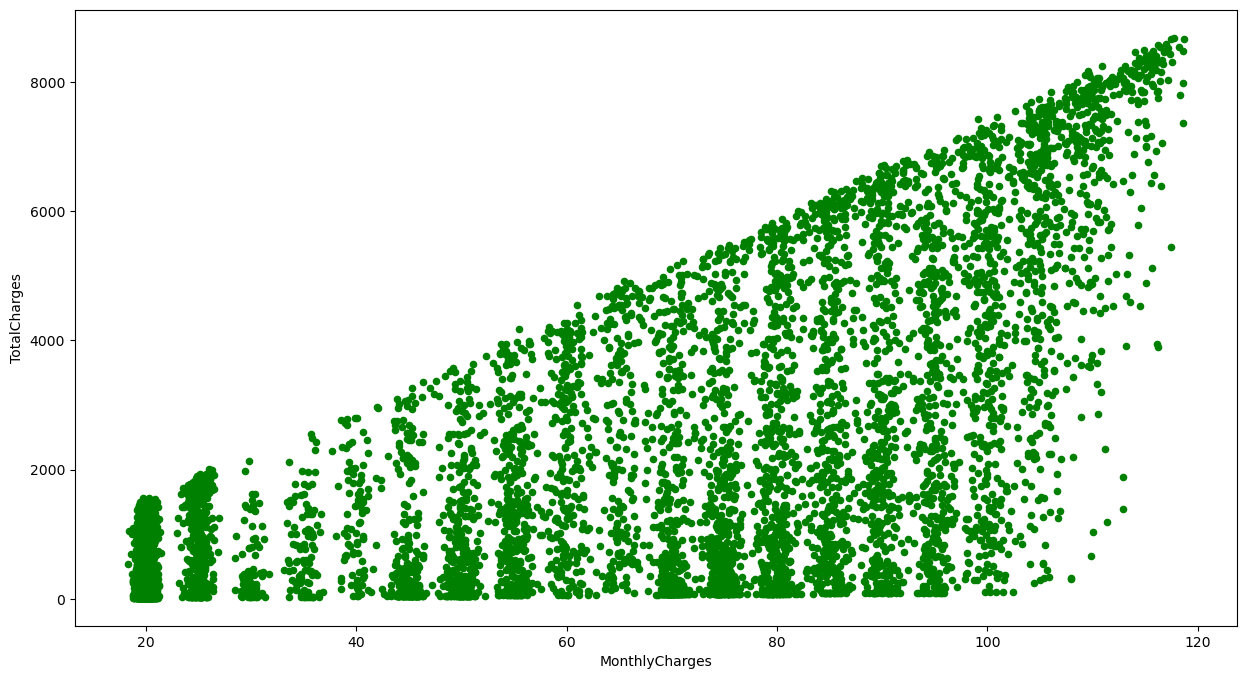

In [23]:
tel[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',
                                                    y='TotalCharges', color = 'green',figsize = (15,8))

#### Insight:
Total Charges are increasing as the monthly charges of a customer increases.

 ### c) Services used by customers

In [24]:
tel.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [25]:
pastel_colors = sns.color_palette("pastel", n_colors=10)

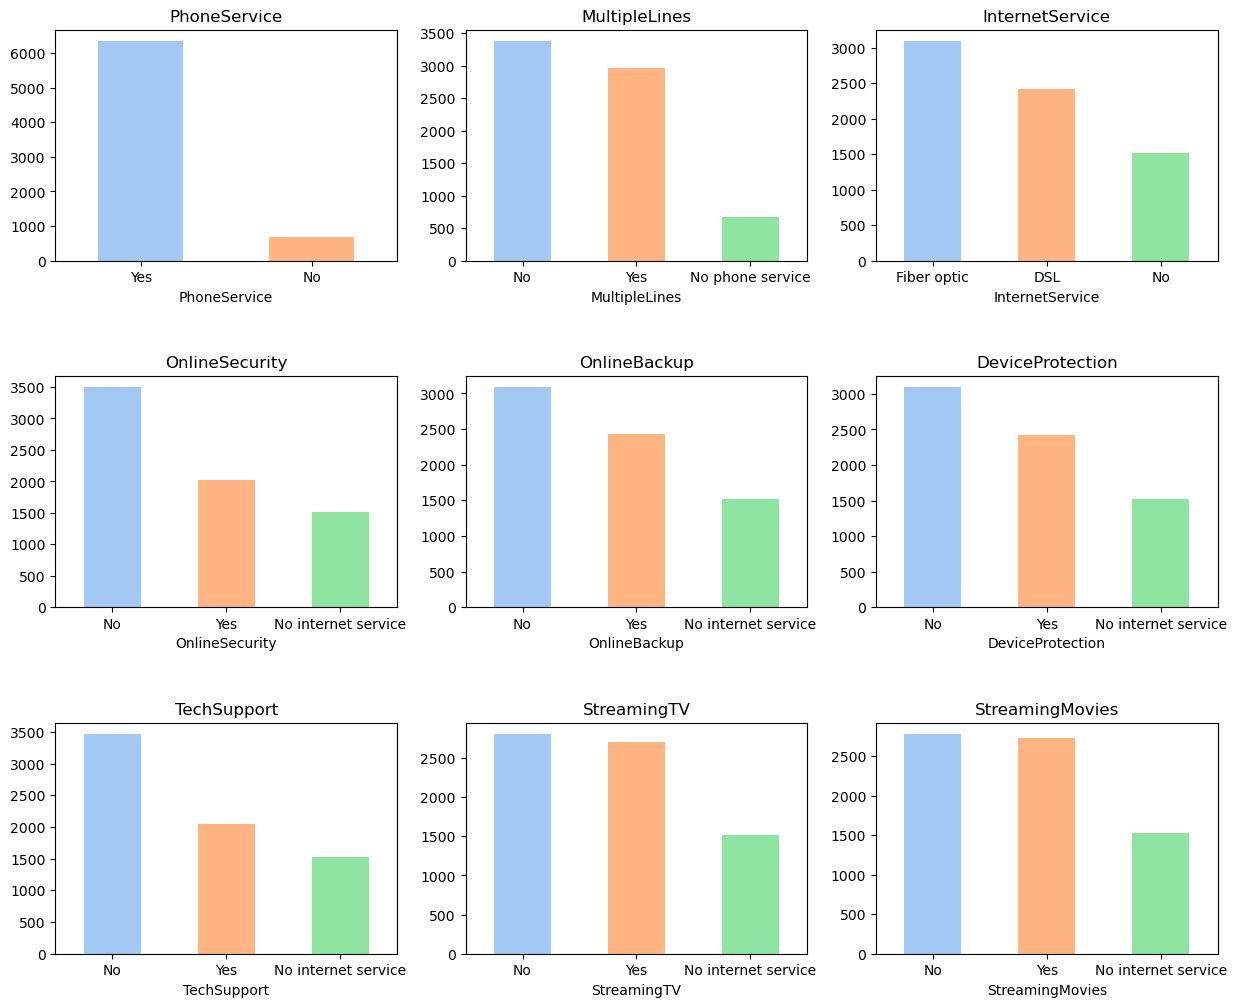

In [26]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']
fig , axes = plt.subplots(nrows = 3 , ncols = 3 , figsize = (15,12))
plt.subplots_adjust(hspace=0.5) # Adjust vertical spaces between subplots

for i , item in enumerate(services):
    row , col = divmod(i,3)  # calculate row and column index
    ax = tel[item].value_counts().plot(kind = 'bar',ax = axes[row,col],rot= 0,color = pastel_colors)
    ax.set_title(item)

    for tick in ax.get_xticklabels():
        tick.set_rotation(0) # rotates x labels for better readability
plt.show()

#### d) Relationship between the dependent variable (Churn) and other important variables.

1) Churn rate with customer

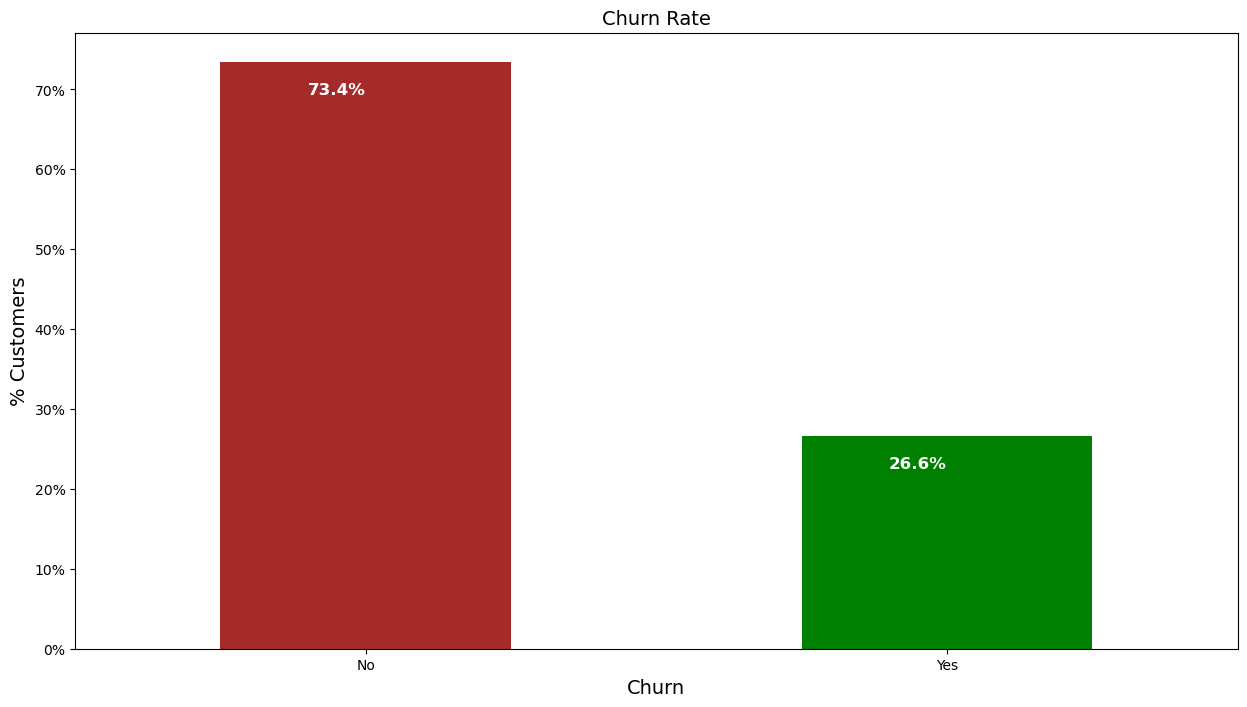

In [27]:
colors = ['brown', 'green']
ax = (tel['Churn'].value_counts() * 100.0 / len(tel)).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors,
    figsize=(15, 8)
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers', size=14)
ax.set_xlabel('Churn', size=14)
ax.set_title('Churn Rate', size=14)

# Create a list to collect the plt.patches data
totals = []

# Find the values and append to the list
for i in ax.patches:
    totals.append(i.get_width())

# Set individual bar labels using the above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',
            fontsize=12,
            color='white',
            weight='bold')

2) Churn Rate by - Tenure , Seniority , Contract Type , monthly charges and total charges

* 2.1 Churn vs. Tenure

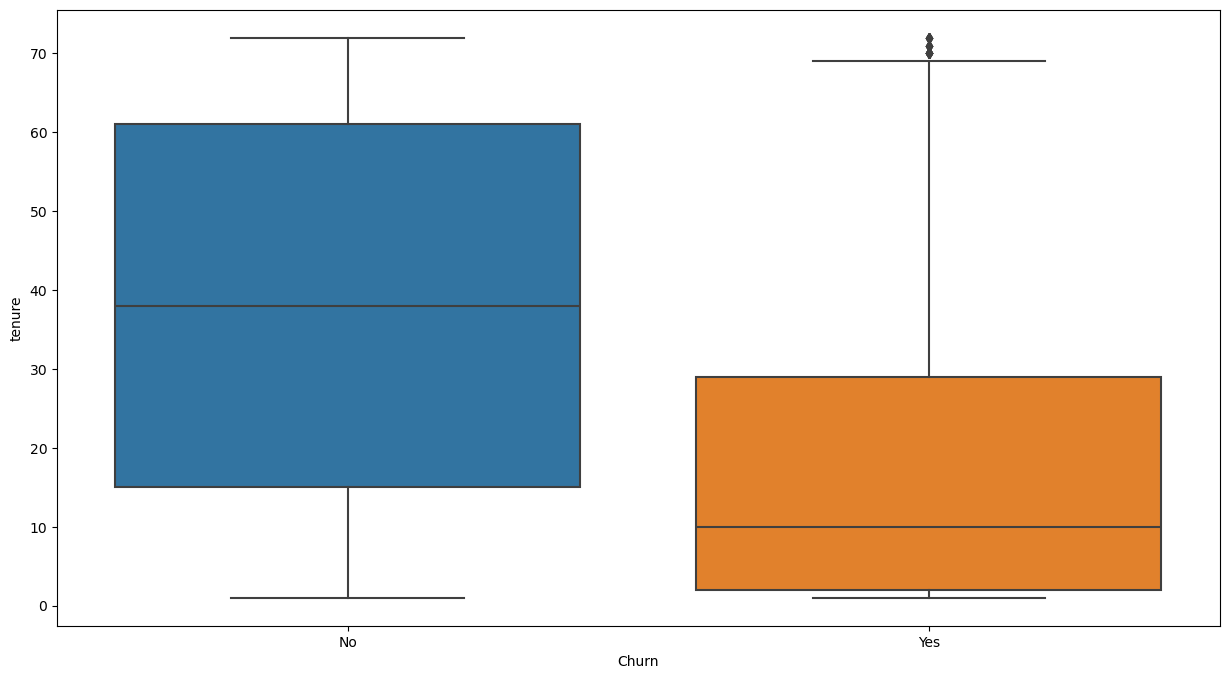

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x= tel.Churn , y = tel.tenure)
plt.show()

#### Insight:
The customer who do not churn , they tend to stay longer time with the telecom company

* 2.2 Churn by Contract Type

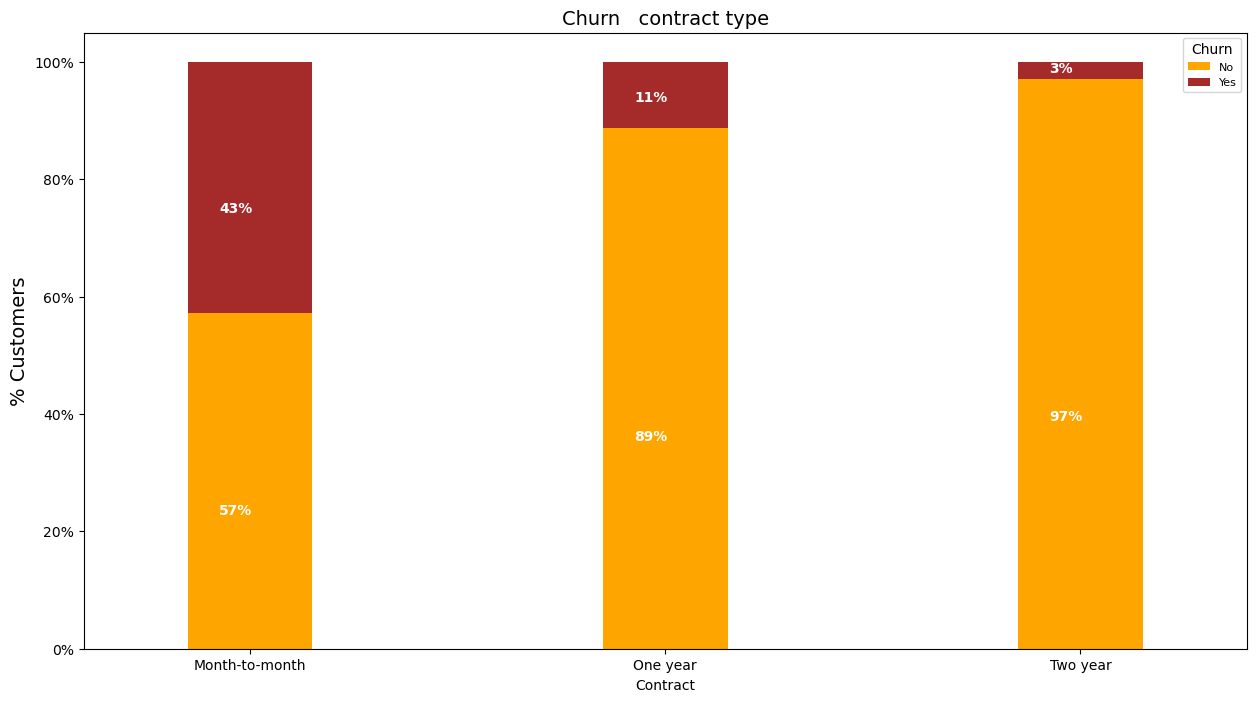

In [29]:
colors = ['orange','brown']
contract_churn = tel.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0,
                                                                figsize = (15,8),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':8},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn   contract type',size = 14)

# Code to add the labels on the stacked bar chart
for p in ax.patches:
    width , height = p.get_width() , p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color = 'White',
                weight = 'bold',
                size = 10)


#### Insight:
The customers who have a month to month contract have a high churn rate.

* 2.3 Churn by Seniority

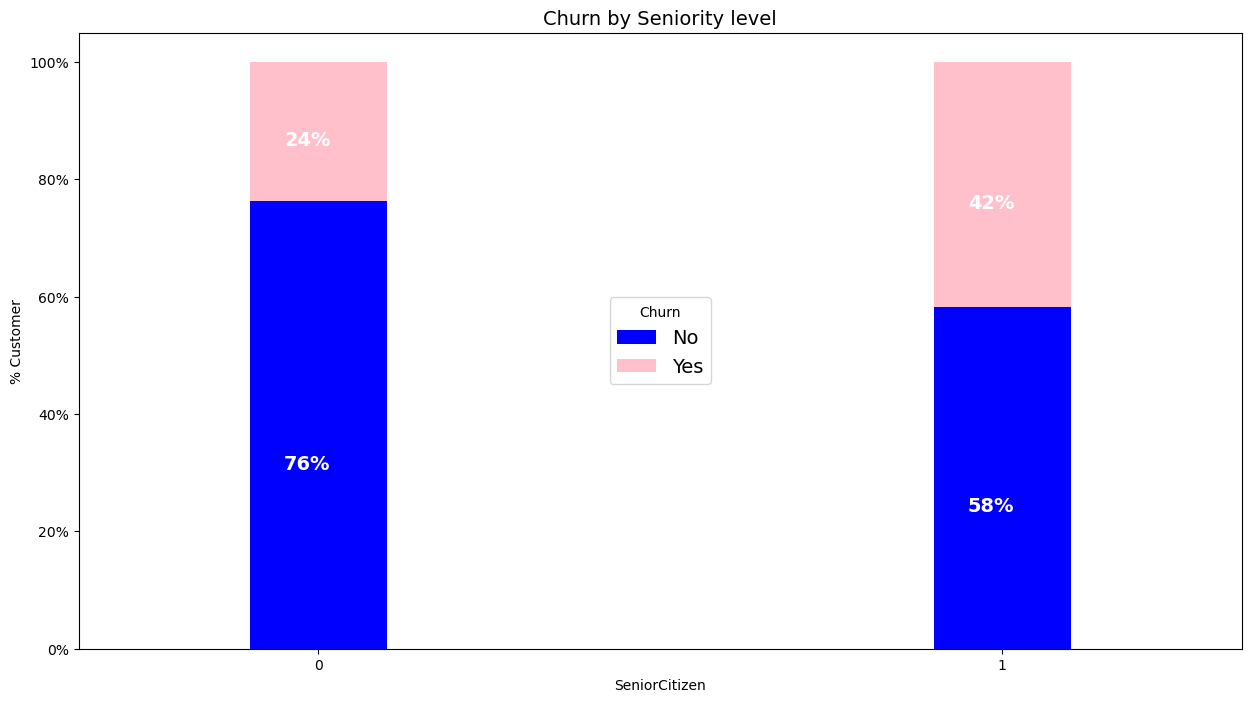

In [30]:
colors = ['blue','pink']
seniority_churn = tel.groupby(['SeniorCitizen','Churn']).size().unstack()

ax =(seniority_churn.T*100.0/seniority_churn.T.sum()).T.plot(kind = 'bar',
                                                             width = 0.2,
                                                             stacked = True,
                                                             rot = 0,
                                                             figsize = (15,8),
                                                             color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc = 'center',prop = {'size':14},title = 'Churn')
ax.set_ylabel('% Customer')
ax.set_title('Churn by Seniority level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width,height = p.get_width(),p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height),(p.get_x()+.25*width,p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',size = 14)

#### Insight: 
Senior Citizen have almost double churn rate than younger population.

* 2.4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

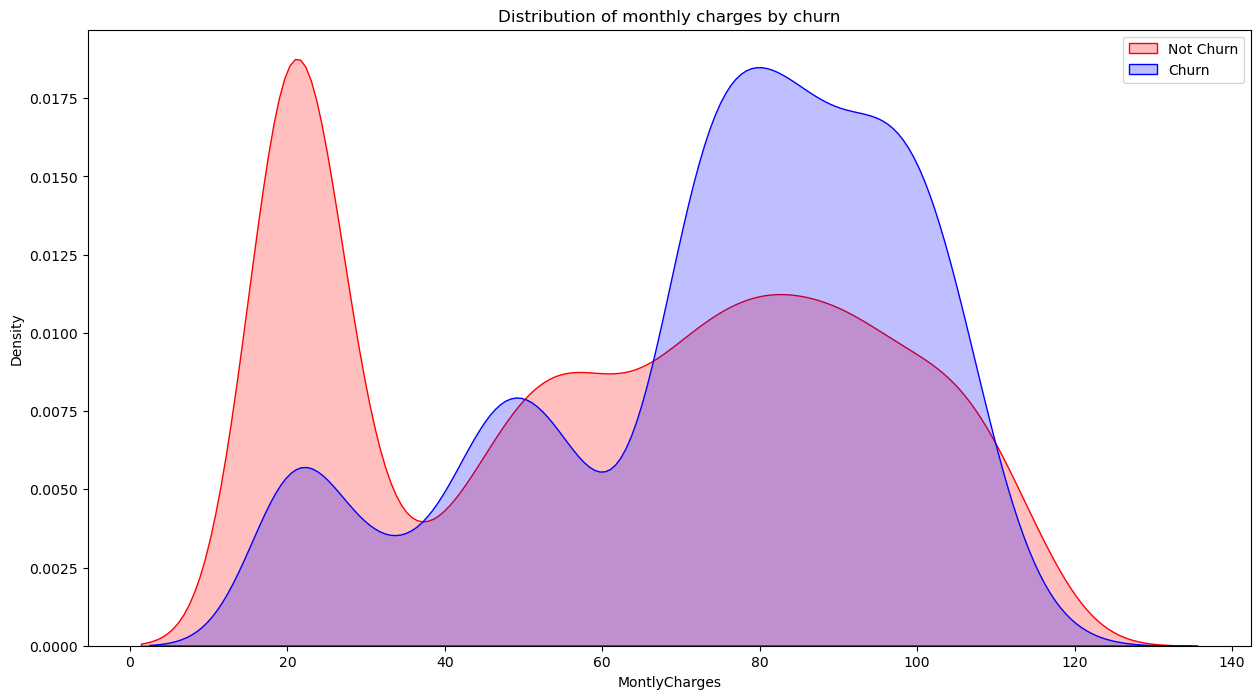

In [31]:
plt.figure(figsize = (15,8))
ax = sns.kdeplot(tel.MonthlyCharges[(tel['Churn']=='No')],
                 color = 'Red',shade = True)
ax = sns.kdeplot(tel.MonthlyCharges[(tel['Churn']=='Yes')],
                 color = 'blue',shade = True)
ax.legend(['Not Churn','Churn'],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('MontlyCharges')
ax.set_title('Distribution of monthly charges by churn')

#### Insight:
Heigher populations of customers churn when Monthly Charges are high.

* 2.5 Churn by total charges

Text(0.5, 1.0, 'Distribution of Total Charges by churn')

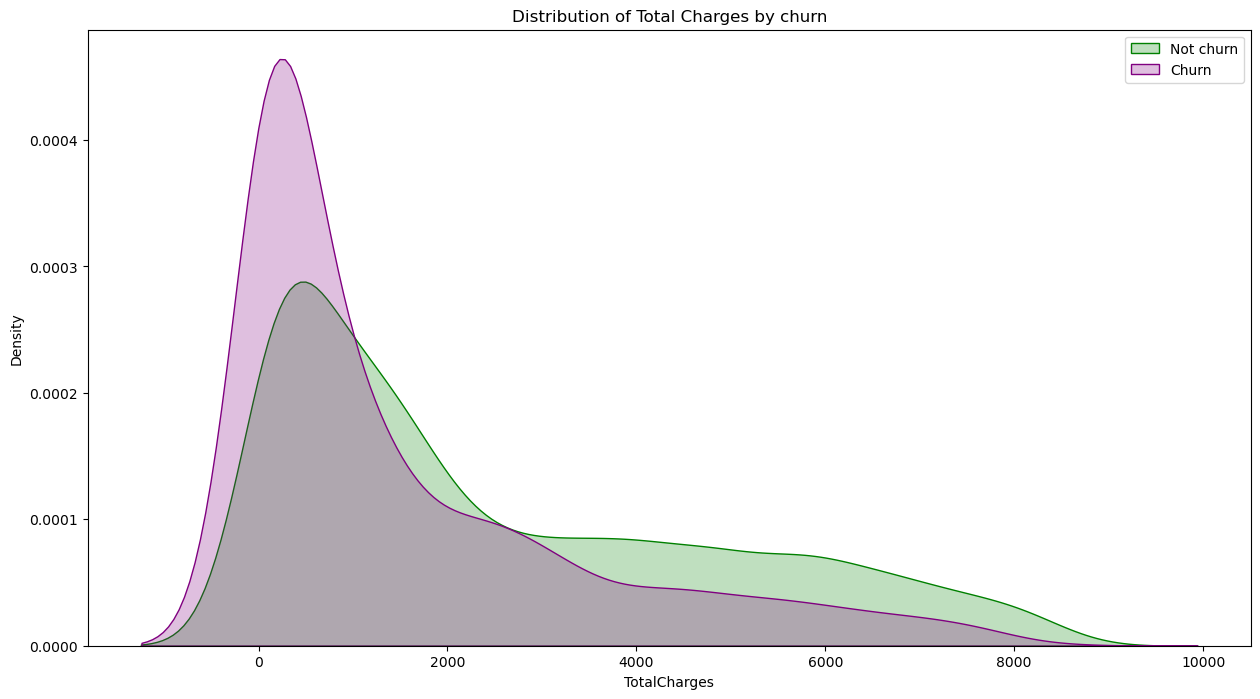

In [32]:
plt.figure(figsize = (15,8))
ax = sns.kdeplot(tel.TotalCharges[(tel['Churn']=='No')],
                 color = 'green',shade = True)
ax = sns.kdeplot(tel.TotalCharges[(tel['Churn']=='Yes')],
                 color = 'purple',shade = True)
ax.legend(['Not churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of Total Charges by churn')

#### Insight:
There is a higher churn when total charges are lower.

## 4. Predictive Modelling 

#### Models Used:
* Logistic Regression
* Random Forest
* Ada Boost
* XG Boost

##### 1. Logistic Regression

In [33]:
y = telco_dummies['Churn'].values
x = telco_dummies.drop(columns = ['Churn'])

In [34]:
# Scaling all the variables to a range of 0 to 1
features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

In [35]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [36]:
# logistic Regression Model
model = LogisticRegression()
result = model.fit(x_train , y_train)

In [37]:
y_pred = model.predict(x_test)

In [38]:
print(metrics.accuracy_score(y_test,y_pred))

0.8075829383886256


In [39]:
y_pred = model.predict(x_test)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



* Interpretation:
1) Precision: Out of all the customers whom my model predicts as churners , 64% truly did.
2) Recall : Out of all the customers who are churners in reality, 54% were correctly identified by my model.
3) F1 Score : Out of all the customers who actually churned and out of all my model predicted as churners , 58% were correctly identified and balanced by my model.

In [40]:
confusion_matrix(y_test,y_pred)

array([[1418,  162],
       [ 244,  286]], dtype=int64)

* Interpretation:
1) TP = 1418 , When my model says the customer will churn , They actually churned.
2) FN = 162 , When my model says the customer will not churn , But they Churn in reality.
3) FP = 244 , When my model says the customer will Churn , But they did not churn in reality.
4) TN = 286 , When my model says the customer will not churn , and they actually did not churn.

Axes(0.125,0.11;0.775x0.77)


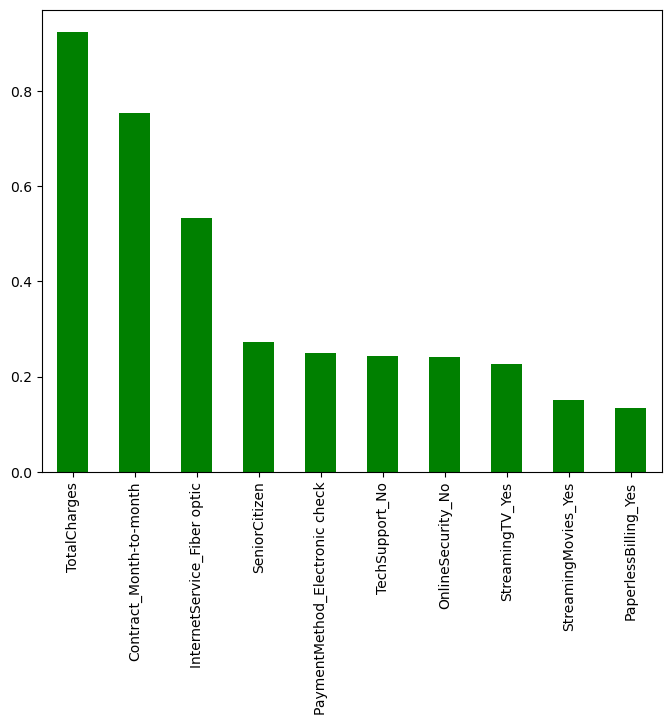

In [41]:
# To get the weight of all the variables

plt.figure(figsize = (8,6))
weight = pd.Series(model.coef_[0],
                   index = x.columns.values)
print(weight.sort_values(ascending = False)[:10].plot(kind = 'bar',color = 'green'))
plt.show()

Axes(0.125,0.11;0.775x0.77)


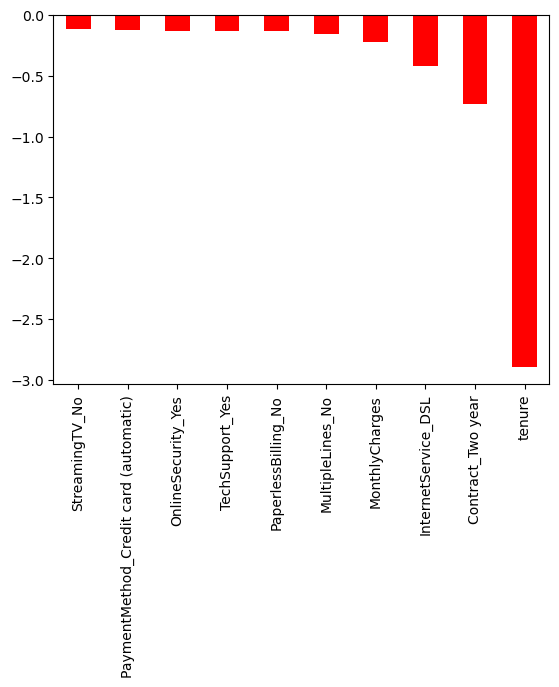

In [42]:
print(weight.sort_values(ascending = False)[-10:].plot(kind='bar',color = 'Red'))

##### Insights :

1) Churn Risk is highest amongest Month-to-Month Contracts,Fiber Optics , Customers without support/Services and the customers using electronic checks.
2) Customer Retention is strongest with Long Tenure , 2 year contracts , Tech Support, Security,Backup Services and Credit Card Auto-pay.

#### 2. Random Forest

In [43]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [44]:
model_rf = RandomForestClassifier(n_estimators = 1000,n_jobs = -1 , random_state = 50 , max_leaf_nodes = 30)
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       random_state=50)

In [45]:
y_pred = model_rf.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8088130774697939


In [46]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1052
           1       0.66      0.49      0.56       355

    accuracy                           0.81      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.80      0.81      0.80      1407



* Interpretation:
1) Precision : Out of all the customers whom my model predicted as Churners , 66% actually left.
2) Recall : Out of all the customers who has churned in reality, only 49% were corecly identified by my model as churners. (left leave company without any warning)
3) F1 Score : Out of all the customers who actually chured and all of ones the model predicted as churners , the model correctly identified and balanced both 56% of the time.

In [47]:
confusion_matrix(y_test,y_pred)

array([[964,  88],
       [181, 174]], dtype=int64)

* Interpretation:
1) TP = 964	 When my model says the customer will churn, and the customer actually churned.	
2) FN = 88	 When my model says the customer will not churn, but the customer actually churned.	
3) FP = 181	 When my model says the customer will churn, but the customer actually did not churn.	
4) TN = 174	 When my model says the customer will not churn, and the customer actually stayed.

#### 3. Ada Boost

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [49]:
model_ada = AdaBoostClassifier()
model_ada.fit(x_train , y_train)

AdaBoostClassifier()

In [50]:
y_pred = model_ada.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8123667377398721

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.66      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



* Interpretation:
1) Precision : Out of all the customers whom my model predicted as Churners , 66% actually left.
2) Recall : Out of all the customers who has churned in reality, only 52% were corecly identified by my model as churners. (left leave company without any warning)
3) F1 Score : Out of all the customers who actually chured and all of ones the model predicted as churners , the model correctly identified and balanced both 58% of the time.

In [52]:
confusion_matrix(y_test,y_pred)

array([[957,  95],
       [169, 186]], dtype=int64)

* Interpretation:
1) TP = 957	 When my model says the customer will churn, and the customer actually churned.	
2) FN = 95	 When my model says the customer will not churn, but the customer actually churned.	
3) FP = 169	 When my model says the customer will churn, but the customer actually did not churn.	
4) TN = 186	 When my model says the customer will not churn, and the customer actually stayed.

#### 4. XG Boost

In [53]:
model_xg = XGBClassifier()
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
y_pred = model_xg.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.7796730632551528

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1052
           1       0.57      0.50      0.53       355

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.77      0.78      0.77      1407



* Interpretation:
1) Precision : Out of all the customers whom my model predicted as Churners , 57% actually left.
2) Recall : Out of all the customers who has churned in reality, only 50% were corecly identified by my model as churners. (left leave company without any warning)
3) F1 Score : Out of all the customers who actually chured and all of ones the model predicted as churners , the model correctly identified and balanced both 53% of the time.

In [56]:
confusion_matrix(y_test,y_pred)

array([[920, 132],
       [178, 177]], dtype=int64)

* Interpretation:
1) TP = 920	 When my model says the customer will churn, and the customer actually churned.	
2) FN = 132 When my model says the customer will not churn, but the customer actually churned.	
3) FP = 178	 When my model says the customer will churn, but the customer actually did not churn.	
4) TN = 177	 When my model says the customer will not churn, and the customer actually stayed.

## Conclusion

The goal of this project was to build a predictive model to identify customers who are likely to churn from a telecom company. Understanding churn behavior is essential for customer retention strategies and proactive business decision-making.

We evaluated four classification models: Logistic Regression, Random Forest, AdaBoost, and XGBoost. After handling data preprocessing and evaluating models using accuracy, precision, recall, F1-score, and confusion matrices, the AdaBoost Classifier emerged as the top-performing model.

#####AdaBoost achieved an accuracy of 81.23%, with a relatively better recall and F1-score for the churn class (1), which is critical in identifying customers who are actually at risk of leaving.

Although Random Forest and Logistic Regression also provided competitive accuracy (~81%), they performed slightly worse in detecting true churn cases, especially in terms of recall.

XGBoost, despite being a powerful model, underperformed in this context with an accuracy of 77.97% and lower recall for the churn class.

Given the business goal of minimizing customer churn, AdaBoost was chosen as the final model due to its balanced performance and better capability to capture customers likely to churn. This model can now be integrated into CRM systems to trigger retention offers, proactive outreach, and improve overall customer satisfaction and loyalty.